CSV Files have been loaded from here: 
* https://dataverse.harvard.edu/api/access/datafile/2699423?format=original&gbrecs=true
* https://dataverse.harvard.edu/api/access/datafile/2699420?format=original&gbrecs=true
* https://dataverse.harvard.edu/api/access/datafile/2741426?format=original&gbrecs=true

In [19]:
import pickle
from datetime import datetime

import pandas as pd

In [20]:
# Allows quick parsing of timestamps to datetime.
# Inspired from https://stackoverflow.com/questions/34122395/reading-a-csv-with-a-timestamp-column-with-pandas
def dateparse (time_in_secs):    
    return datetime.fromtimestamp(float(time_in_secs))

### Dryer

In [21]:
df = pd.read_csv("Electricity_CDE.csv", parse_dates=True, date_parser=dateparse, index_col=0)
df.head()

,V,I,f,DPF,APF,P,Pt,Q,Qt,S,St
unix_ts,,,,,,,,,,,
2012-04-01 09:00:00,238.0,0.0,60.0,1.0,0.00,0,39791,0,5877,0,66147
2012-04-01 09:01:00,238.0,0.0,60.0,1.0,0.00,0,39791,0,5877,0,66148
2012-04-01 09:02:00,237.7,0.0,60.0,1.0,0.04,0,39791,0,5877,0,66148
2012-04-01 09:03:00,238.0,0.0,60.0,1.0,0.04,0,39791,0,5877,0,66148
2012-04-01 09:04:00,237.8,0.0,60.0,1.0,0.00,0,39791,0,5877,0,66148


We are only interested in active power, and found one dryer run in the first day.

<AxesSubplot:xlabel='unix_ts'>

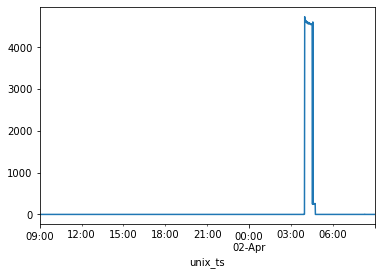

In [22]:
df["P"][:24*60].plot()

Lets extract the power consumption profile of the dryer.

<AxesSubplot:xlabel='unix_ts'>

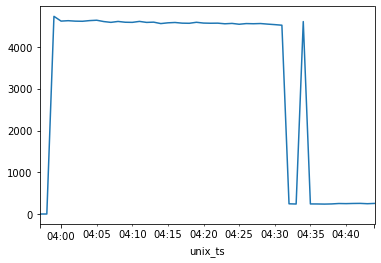

In [23]:
df_day = df["P"][:24*60]
machine_active = df_day > 0
df_day[machine_active][:-1].plot()  # The last value is an outlier

In [24]:
dryer_profile = df_day[machine_active][:-1].tolist()
dryer_profile

[6,
 6,
 4730,
 4616,
 4626,
 4615,
 4612,
 4628,
 4637,
 4605,
 4586,
 4608,
 4589,
 4586,
 4609,
 4585,
 4591,
 4557,
 4575,
 4583,
 4567,
 4564,
 4588,
 4569,
 4565,
 4567,
 4552,
 4561,
 4541,
 4557,
 4553,
 4558,
 4544,
 4532,
 4518,
 250,
 245,
 4605,
 247,
 246,
 243,
 247,
 257,
 254,
 258,
 260,
 252,
 259]

### Clothes washing machine
Similar approach as above

In [25]:
df = pd.read_csv("Electricity_CWE.csv", parse_dates=True, date_parser=dateparse, index_col=0)
df.head()

,V,I,f,DPF,APF,P,Pt,Q,Qt,S,St
unix_ts,,,,,,,,,,,
2012-04-01 09:00:00,118.5,0.0,60.00,1.0,1.0,0,3025,0,705,0,4724
2012-04-01 09:01:00,118.6,0.0,60.06,1.0,1.0,0,3025,0,705,0,4724
2012-04-01 09:02:00,118.5,0.0,60.00,1.0,1.0,0,3025,0,705,0,4724
2012-04-01 09:03:00,118.5,0.0,60.00,1.0,1.0,0,3025,0,705,0,4724
2012-04-01 09:04:00,118.6,0.0,60.00,1.0,1.0,0,3025,0,705,0,4724


<AxesSubplot:xlabel='unix_ts'>

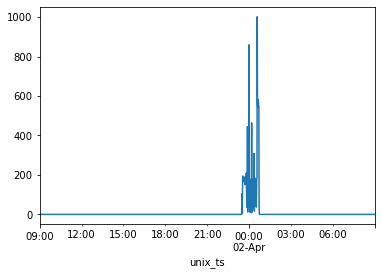

In [26]:
df["P"][:24*60].plot()

<AxesSubplot:xlabel='unix_ts'>

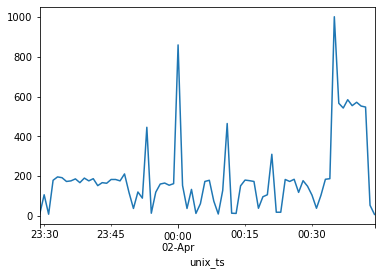

In [27]:
df_day = df["P"][:24*60]
machine_active = df_day > 0
df_day[machine_active].plot()

In [28]:
washing_machine_profile = df_day[machine_active].tolist()
washing_machine_profile

[7,
 105,
 7,
 178,
 195,
 191,
 172,
 175,
 185,
 166,
 189,
 175,
 186,
 151,
 166,
 163,
 182,
 182,
 175,
 210,
 117,
 36,
 119,
 88,
 445,
 12,
 118,
 159,
 164,
 153,
 161,
 860,
 152,
 36,
 132,
 11,
 60,
 172,
 178,
 73,
 8,
 127,
 464,
 12,
 11,
 150,
 179,
 176,
 172,
 37,
 95,
 105,
 309,
 17,
 17,
 182,
 172,
 183,
 117,
 176,
 148,
 103,
 37,
 102,
 183,
 186,
 1002,
 566,
 542,
 584,
 554,
 571,
 552,
 547,
 52,
 6]

### Dishwasher machine
Similar approach as above

In [29]:
df = pd.read_csv("Electricity_DWE.csv", parse_dates=True, date_parser=dateparse, index_col=0)
df.head()

,V,I,f,DPF,APF,P,Pt,Q,Qt,S,St
unix_ts,,,,,,,,,,,
2012-04-01 09:00:00,118.7,0.0,60.0,1.0,1.0,0,1075,0,95,0,1106
2012-04-01 09:01:00,119.2,0.0,60.0,1.0,1.0,0,1075,0,95,0,1106
2012-04-01 09:02:00,118.9,0.0,60.0,1.0,1.0,0,1075,0,95,0,1106
2012-04-01 09:03:00,119.0,0.0,60.0,1.0,1.0,0,1075,0,95,0,1106
2012-04-01 09:04:00,118.7,0.0,60.0,1.0,1.0,0,1075,0,95,0,1106


<AxesSubplot:xlabel='unix_ts'>

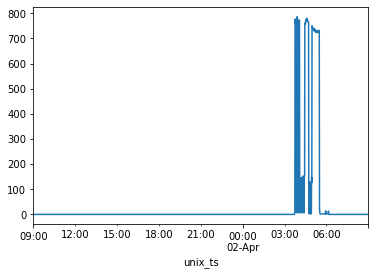

In [30]:
df["P"][:24*60].plot()

<AxesSubplot:xlabel='unix_ts'>

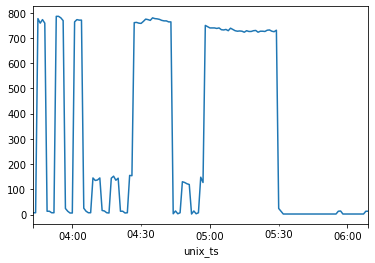

In [31]:
df_day = df["P"][:24*60]
machine_active = df_day > 0
df_day[machine_active].plot()

In [32]:
dishwasher_profile = df_day[machine_active].tolist()
dishwasher_profile

[7,
 7,
 777,
 759,
 773,
 759,
 13,
 13,
 7,
 7,
 786,
 786,
 780,
 769,
 24,
 13,
 6,
 6,
 764,
 773,
 771,
 771,
 25,
 13,
 7,
 7,
 145,
 135,
 137,
 145,
 16,
 14,
 7,
 6,
 144,
 152,
 136,
 144,
 13,
 13,
 6,
 7,
 155,
 154,
 761,
 762,
 759,
 758,
 766,
 775,
 773,
 770,
 780,
 777,
 776,
 774,
 770,
 768,
 768,
 764,
 764,
 3,
 14,
 3,
 7,
 130,
 127,
 122,
 119,
 2,
 14,
 3,
 7,
 148,
 127,
 750,
 745,
 740,
 740,
 740,
 738,
 740,
 733,
 732,
 734,
 729,
 739,
 734,
 729,
 727,
 728,
 727,
 723,
 729,
 726,
 726,
 729,
 730,
 723,
 727,
 727,
 726,
 731,
 732,
 727,
 725,
 731,
 24,
 13,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 13,
 14,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 13,
 13]

### Save the profiles

In [40]:
profiles = {
    "dryer": dryer_profile,
    "washingmachine": washing_machine_profile,
    "dishwasher": dishwasher_profile,
}
with open("appliances_profiles.pickle", "wb") as f:
    pickle.dump(profiles, f)